In [1]:
import tensorflow as tf
import numpy as np
import msgpack
from matplotlib import pyplot as plt

2024-06-09 09:45:02.311308: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf_model = tf.keras.layers.TFSMLayer("../models/ff", call_endpoint='serving_default')

In [3]:
tf_model(np.array([[0 for _ in range(49)]]))['output_0'][0].numpy()

array([0.0044022, 0.9444994, 0.5689741, 0.5626934], dtype=float32)

In [4]:
tf_model.weights[0].numpy()

array([[-0.19984041, -0.12832434,  0.09712023, ..., -0.05100975,
        -0.89087814, -0.303382  ],
       [ 0.09289641,  0.19027814,  0.46740314, ..., -0.4701155 ,
        -0.25156882, -0.4737987 ],
       [-0.9174766 , -0.14680734,  0.10059495, ..., -0.45702773,
         0.24639596,  0.6588365 ],
       ...,
       [-0.18923774, -0.23020937, -0.39485708, ..., -0.13459098,
        -0.22156632, -0.26794708],
       [ 0.00344437, -0.35381958, -0.30992863, ...,  0.10659268,
        -0.0899815 , -0.06729488],
       [ 0.350427  , -0.5368769 , -0.36341074, ...,  0.2630073 ,
        -0.11869451, -0.25971225]], dtype=float32)

In [5]:
def tf2np(tf_model, path):
    packer = msgpack.Packer()
    with open(path, "wb") as f:
        for w in tf_model.weights:
            w = w.numpy().astype(np.float32)
            f.write(packer.pack(w.shape))
            f.write(packer.pack(w.tobytes()))

In [6]:
tf2np(tf_model, "../models/ff.np")

In [7]:
def load(path):
    with open(path, "rb") as f:
        unpacker = msgpack.Unpacker(f)
        for shape in unpacker:
            weights = np.frombuffer(next(unpacker), dtype=np.float32).reshape(shape)
            yield weights
loaded = list(load("../models/ff.np"))

In [8]:
for i in range(4):
    print(np.sum(tf_model.weights[i].numpy() - loaded[i]))

0.0
0.0
0.0
0.0


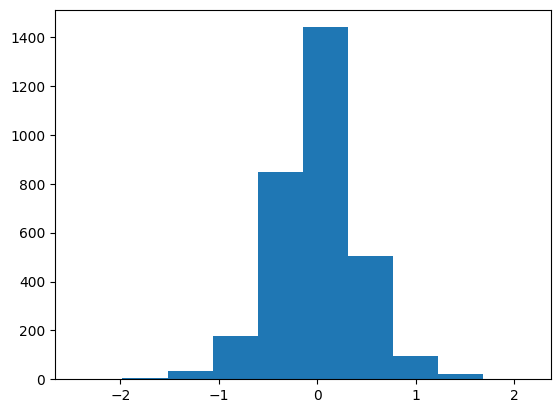

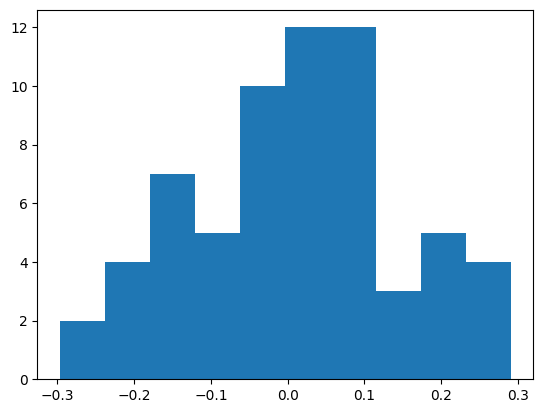

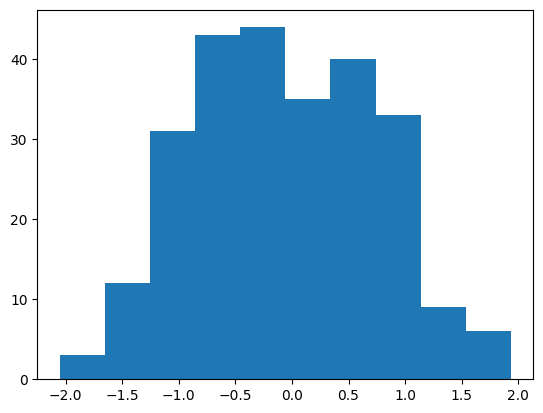

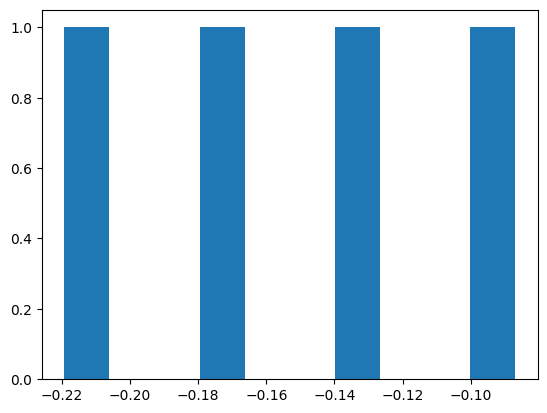

In [9]:
for i in range(4):
    plt.hist(tf_model.weights[i].numpy().reshape(1, -1)[0])
    plt.show()